In [55]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import joblib
import plotnine as pn
#import plydata.cat_tools as cat
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
#import missingno as msno

ModuleNotFoundError: No module named 'plotnine'

In [4]:
#Import the data
dataf = pd.read_excel('Data Analyst Shox Rumahan - Technical Test.xlsx', engine='openpyxl')

In [5]:
dataf.head()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp)
0,2020-11-01,SHOXR13234,Order - Cash,Jawa Barat,Sumedang,Sumedang Utara,SM - Yeti,400000.0
1,2020-11-02,SHOXR56,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,484400.0
2,2020-11-02,SHOXR14601,Order - Cash,Jawa Barat,Ciamis,Ciamis,SM - David,399600.0
3,2020-11-02,SHOXR11589,Order - Cash,Jawa Barat,Bandung,Katapang,SM - Ati,248800.0
4,2020-11-02,SHOXR3578,Order - Cash,Jawa Barat,Cimahi,Cimahi Tengah,SM - Niko,238800.0


In [6]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         16610 non-null  datetime64[ns]
 1   Customer ID     16610 non-null  object        
 2   Notes           16610 non-null  object        
 3   Provinsi        16413 non-null  object        
 4   Kota/Kabupaten  16413 non-null  object        
 5   Kecamatan       16405 non-null  object        
 6   Sales Manager   16592 non-null  object        
 7   Booking (Rp)    16610 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.0+ MB


In [7]:
# Inspect missing values in the dataset
print(dataf.isnull().values.sum())

# Replace the ' 's with NaN
dataf = dataf.replace(" ",np.NaN)

# Impute the missing values with mean imputation
dataf = dataf.fillna(dataf.mean())

# Count the number of NaNs in the dataset to verify
print(dataf.isnull().values.sum())

617


<ipython-input-7-f4f2ddbb9d15>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  dataf = dataf.fillna(dataf.mean())


617


In [9]:
print(dataf.info())
for col in dataf.columns:
    # Check if the column is of object type
    if dataf[col].dtypes == 'object':
        # Impute with the most frequent value
       dataf[col] = dataf[col].fillna(dataf[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(dataf.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Tanggal         16610 non-null  datetime64[ns]
 1   Customer ID     16610 non-null  object        
 2   Notes           16610 non-null  object        
 3   Provinsi        16610 non-null  object        
 4   Kota/Kabupaten  16610 non-null  object        
 5   Kecamatan       16610 non-null  object        
 6   Sales Manager   16610 non-null  object        
 7   Booking (Rp)    16610 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.0+ MB
None
0


In [18]:
#Get month
def getmonth(x):
    return dt.datetime(x.year, x.month,1)

dataf['Bulan'] = dataf['Tanggal'].apply(getmonth)
dataf.head()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp),Bulan
0,2020-11-01,SHOXR13234,Order - Cash,Jawa Barat,Sumedang,Sumedang Utara,SM - Yeti,400000.0,2020-11-01
1,2020-11-02,SHOXR56,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,484400.0,2020-11-01
2,2020-11-02,SHOXR14601,Order - Cash,Jawa Barat,Ciamis,Ciamis,SM - David,399600.0,2020-11-01
3,2020-11-02,SHOXR11589,Order - Cash,Jawa Barat,Bandung,Katapang,SM - Ati,248800.0,2020-11-01
4,2020-11-02,SHOXR3578,Order - Cash,Jawa Barat,Cimahi,Cimahi Tengah,SM - Niko,238800.0,2020-11-01


In [19]:
dataf['Cohort Bulan'] = dataf.groupby('Customer ID')['Bulan'].transform('min')
dataf.head()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp),Bulan,Cohort Bulan
0,2020-11-01,SHOXR13234,Order - Cash,Jawa Barat,Sumedang,Sumedang Utara,SM - Yeti,400000.0,2020-11-01,2020-11-01
1,2020-11-02,SHOXR56,Order - Cash,Jawa Barat,Garut,Malangbong,SM - Denis,484400.0,2020-11-01,2020-11-01
2,2020-11-02,SHOXR14601,Order - Cash,Jawa Barat,Ciamis,Ciamis,SM - David,399600.0,2020-11-01,2020-11-01
3,2020-11-02,SHOXR11589,Order - Cash,Jawa Barat,Bandung,Katapang,SM - Ati,248800.0,2020-11-01,2020-11-01
4,2020-11-02,SHOXR3578,Order - Cash,Jawa Barat,Cimahi,Cimahi Tengah,SM - Niko,238800.0,2020-11-01,2020-11-01


In [22]:
#create a date element function to get a series for subtraction
def get_date_element(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [23]:
_,Invoice_bulan,Invoice_tahun = get_date_element(dataf, 'Bulan')
_,Cohort_bulan,Cohort_tahun = get_date_element(dataf, 'Cohort Bulan')

In [62]:
#Create cohort index
year_diff = Invoice_tahun - Cohort_tahun
month_diff = Invoice_bulan - Cohort_bulan
dataf['CohortIndex'] = year_diff*12+month_diff+1
dataf.tail()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp),Bulan,Cohort Bulan,CohortIndex
16605,2021-10-15,SHOXR202478,Order - Arisan Monthly,DKI Jakarta,Kota Jakarta Barat,Kembangan,SM - Muhamad Firdaus,876800.0,2021-10-01,2021-10-01,1
16606,2021-10-15,SHOXR202023,Order - Arisan Monthly,Jawa Barat,Bandung,Malangbong,SM - Yanuar Angga,868960.0,2021-10-01,2021-10-01,1
16607,2021-10-15,SHOXR105189,Order - Arisan Monthly,Jawa Timur,Blitar,Sanan Wetan,SM - Zayinul Khuluq (Luqy),646400.0,2021-10-01,2021-02-01,9
16608,2021-10-15,SHOXR202856,Order - Arisan Monthly,Banten,Kota Tangerang Selatan,Pamulang,TM - Aulia Indah Sari,436800.0,2021-10-01,2021-10-01,1
16609,2021-10-15,SHOXR185278,Order - Arisan Monthly,Jawa Tengah,Sukoharjo,Kartasura,SM - Office,313600.0,2021-10-01,2021-10-01,1


In [63]:
#count customer ID by grouping cohort month and cohort index
cohort_data = dataf.groupby(['Cohort Bulan','CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Bulan,CohortIndex,Customer ID
0,2020-11-01,1,236
1,2020-11-01,2,144
2,2020-11-01,3,125
3,2020-11-01,4,83
4,2020-11-01,5,89
...,...,...,...
73,2021-08-01,2,149
74,2021-08-01,3,75
75,2021-09-01,1,426
76,2021-09-01,2,122


In [64]:
#Create pivot
cohort_table = cohort_data.pivot(index='Cohort Bulan', columns='CohortIndex', values='Customer ID')

In [65]:
cohort_table_percent = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
cohort_table_percent

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Bulan,,,,,,,,,,,,
2020-11-01,1.0,0.610169,0.529661,0.351695,0.377119,0.355932,0.258475,0.216102,0.309322,0.351695,0.326271,0.237288
2020-12-01,1.0,0.435484,0.306452,0.241935,0.177419,0.153226,0.173387,0.209677,0.250000,0.209677,0.120968,NaN
2021-01-01,1.0,0.484594,0.319328,0.254902,0.201681,0.187675,0.252101,0.274510,0.282913,0.126050,NaN,NaN
2021-02-01,1.0,0.343750,0.240385,0.129808,0.189904,0.189904,0.209135,0.233173,0.105769,NaN,NaN,NaN
2021-03-01,1.0,0.401473,0.186004,0.152855,0.206262,0.239411,0.226519,0.092081,NaN,NaN,NaN,NaN
2021-04-01,1.0,0.228814,0.132768,0.172316,0.158192,0.183616,0.079096,NaN,NaN,NaN,NaN,NaN
2021-05-01,1.0,0.276860,0.231405,0.210744,0.190083,0.090909,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-01,1.0,0.349057,0.268868,0.283019,0.146226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,1.0,0.341818,0.309091,0.112727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#create visualitation
#cohort_table_percent.index = cohort_table_percent.index.strftime('%B %Y')
plt.figure(figsize=(25,10))
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 20)
sns.heatmap(cohort_table_percent, annot=True, fmt='.0%')
plt.ylabel('Cohort Month', fontsize = 16)
plt.xlabel('Cohort Index', fontsize=16)
plt.savefig('RetentionMonthly.jpg')

In [73]:
new_data1 = dataf.sort_values(['Customer ID','Tanggal'])

In [75]:
new_data1.tail()

,Tanggal,Customer ID,Notes,Provinsi,Kota/Kabupaten,Kecamatan,Sales Manager,Booking (Rp)
13592,2021-09-12,SHOXR9878,Order - Arisan Monthly,Jawa Barat,Bandung,Rancaekek,SM - Ati,8382400.0
14086,2021-09-19,SHOXR9878,Order - Arisan Monthly,Jawa Barat,Bandung,Rancaekek,SM - Ati,2243200.0
15029,2021-09-24,SHOXR9878,Order - Arisan Monthly,Jawa Barat,Bandung,Rancaekek,SM - Ati,2835200.0
16061,2021-10-10,SHOXR9878,Order - Arisan Monthly,Jawa Barat,Bandung,Rancaekek,SM - Ati,7371200.0
644,2020-12-07,SHOXR9910,Order - Cash,Jabodetabek,Bogor,Cibinong,SM - Vita,283040.0


In [76]:
new_data = new_data1.reset_index().set_index(['Tanggal'])

In [69]:
new_data['Booking (Rp)'].resample(rule='MS').sum()

Tanggal
2020-11-01    3.140187e+08
2020-12-01    8.925922e+08
2021-01-01    1.506081e+09
2021-02-01    1.712332e+09
2021-03-01    3.038768e+09
2021-04-01    2.533204e+09
2021-05-01    2.798038e+09
2021-06-01    1.977970e+09
2021-07-01    3.554601e+09
2021-08-01    5.832118e+09
2021-09-01    7.321463e+09
2021-10-01    2.934779e+09
Freq: MS, Name: Booking (Rp), dtype: float64

<AxesSubplot:xlabel='Tanggal'>

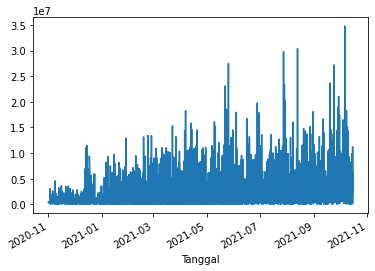

In [70]:
new_data['Booking (Rp)'].plot()

In [81]:
#Individual Customer Purchase
ids = new_data1['Customer ID'].unique()
ids

array(['SHOXR100012', 'SHOXR100056', 'SHOXR100101', ..., 'SHOXR9845',
       'SHOXR9878', 'SHOXR9910'], dtype=object)

In [124]:
ids_selected = ids[0:10]
ids_selected

array(['SHOXR100012', 'SHOXR100056', 'SHOXR100101', 'SHOXR100123',
       'SHOXR100134', 'SHOXR100234', 'SHOXR100278', 'SHOXR1002910',
       'SHOXR100323', 'SHOXR100345'], dtype=object)

In [125]:
new_data2 = new_data[new_data['Customer ID'].isin(ids_selected)].reset_index()

In [126]:
newdata3 = new_data2.groupby(['Customer ID','Tanggal'])
newdata4 = newdata3.sum()
newdata4.drop(columns=['index'], inplace=True)

In [127]:
newdata4.head()

Booking (Rp)
Customer ID Tanggal                 
SHOXR100012 2021-01-20     1492000.0
SHOXR100056 2021-03-07      289600.0
SHOXR100101 2021-01-29     1478400.0
            2021-07-26     1680000.0
SHOXR100123 2021-02-03     4774400.0

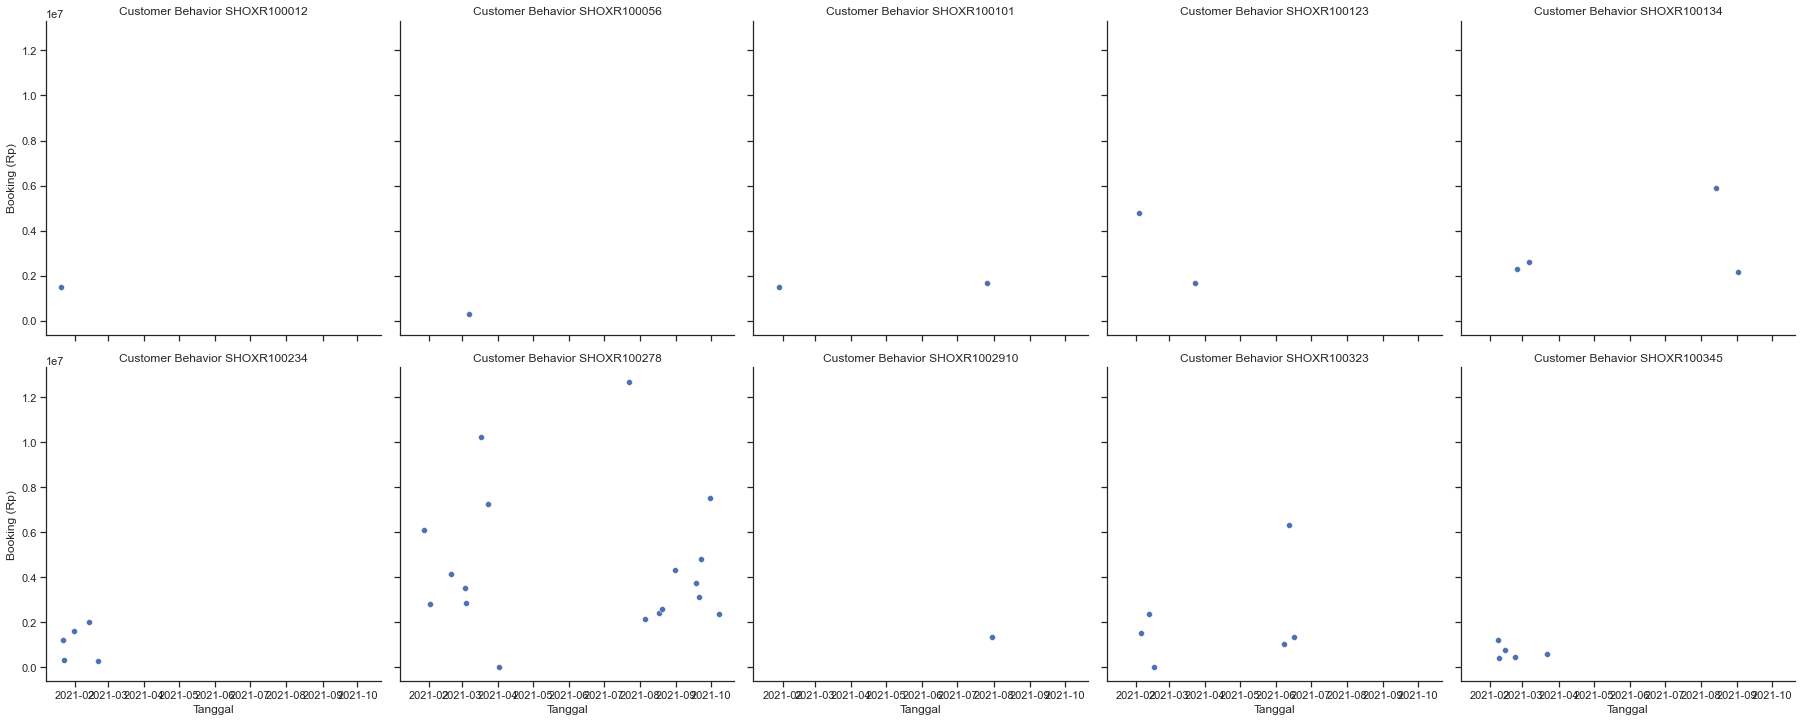

In [155]:
sns.set_theme(style="ticks")

grid = sns.relplot(data=newdata4, x="Tanggal", y="Booking (Rp)", col="Customer ID", col_wrap=5)

grid.set_titles("Customer Behavior {col_name}")
#grid.savefig(customer.jpg)